# Speed Dating Analysis
### Authors:  Savin Anatolii, Temerbulatova Diana, Sehen Anastasiya, Grinevich Diana

### Introduction
### 1. Data exploration
### 2. Data preprocessing
### 3. Modeling
### 3. 1. Decision tree
### 3. 2. Random forest
### 3. 3 Clustering
### 4. Explanation
### 5 Conclution

***

## Introduction

Machine learning allows us to solve various complex tasks and improve decision-making processes. Our goal was to predict matches between people in the context of speed dating.
The dataset used for this task is the Speed Dating dataset available on Kaggle (https://www.kaggle.com/datasets/ulrikthygepedersen/speed-dating). This data contains various information about the participants of these speed-dating: demographic information, personal characteristics, hobbies, preferences. The target variable in this dataset is "match", which indicates whether two people matched after the speed dating event. By using machine learning in this situation, dating companies can improve the service they provide and increase customer satisfaction.
Our target variable "match" is already binary, so we don't need to transform it. The instance of interest will be a particular participant identified by their ID. The attribute of interest will be the personal qualities of the participant. The subset of interest will consist of participants with similar interests and preferences. The cost matrix could be given through providing the cost of a true positive (1), true negative (1), false positive (2) and false negative (3). This will express that the highest cost will be incurred when the classifier will predict a match but the actual result will be unmatch. This will help to evaluate the performance of the machine learning model in terms of the cost of incorrect predictions.
As the instance of interest, we picked 11th row.Its parameters are

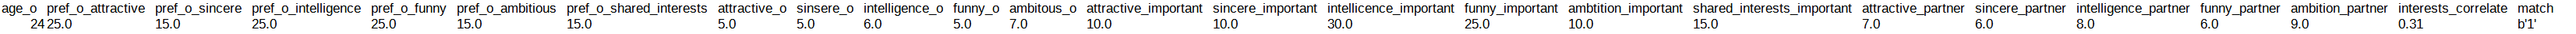

## 1. Data exploration

At the beggining we will import all necessary libraries,dataset and setup our graph

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.utils import resample

dates = pd.read_csv(r'C:\pd\speeddating.csv')
plt.rc('figure', figsize=(12, 5))

At first let`s explore our data

In [10]:
dates.info

<bound method DataFrame.info of      has_null  wave     gender   age  age_o  d_age   d_d_age  \
0         b''   1.0  b'female'  21.0   27.0    6.0  b'[4-6]'   
1         b''   1.0  b'female'  21.0   22.0    1.0  b'[0-1]'   
2         b''   1.0  b'female'  21.0   22.0    1.0  b'[0-1]'   
3         b''   1.0  b'female'  21.0   23.0    2.0  b'[2-3]'   
4         b''   1.0  b'female'  21.0   24.0    3.0  b'[2-3]'   
...       ...   ...        ...   ...    ...    ...       ...   
8373      b''  21.0    b'male'  25.0   26.0    1.0  b'[0-1]'   
8374      b''  21.0    b'male'  25.0   24.0    1.0  b'[0-1]'   
8375      b''  21.0    b'male'  25.0   29.0    4.0  b'[4-6]'   
8376      b''  21.0    b'male'  25.0   22.0    3.0  b'[2-3]'   
8377      b''  21.0    b'male'  25.0   22.0    3.0  b'[2-3]'   

                                          race  \
0     b'Asian/Pacific Islander/Asian-American'   
1     b'Asian/Pacific Islander/Asian-American'   
2     b'Asian/Pacific Islander/Asian-American'   

In [173]:
dates.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,b'',1.0,b'female',21.0,27.0,6.0,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
1,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,5.0,b'[6-8]',b'[5-6]',1.0,b'1',b'0',b'0'
2,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',...,b'[0-3]',b'[3-5]',7.0,NaN,b'[6-8]',b'[0-4]',1.0,b'1',b'1',b'1'
3,b'',1.0,b'female',21.0,23.0,2.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'
4,b'',1.0,b'female',21.0,24.0,3.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',6.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'


As we can see, dataset has 8378 rows and 123 columns.Some columns repeat themeselfes and some don't contain any usefull infromation. We will fix all the issues later, but now let's explore the dataset structure. The most significant columns are:


 ###### 1. Match

Our target variable. Value 0 means that the match did not happen after the date, 1 means that it did. As we can see, match is  a pretty rare event - only aprox. 20% of dates were successfull for both sides. Also it means that we will nedd to fix an imbalance of our dataset.

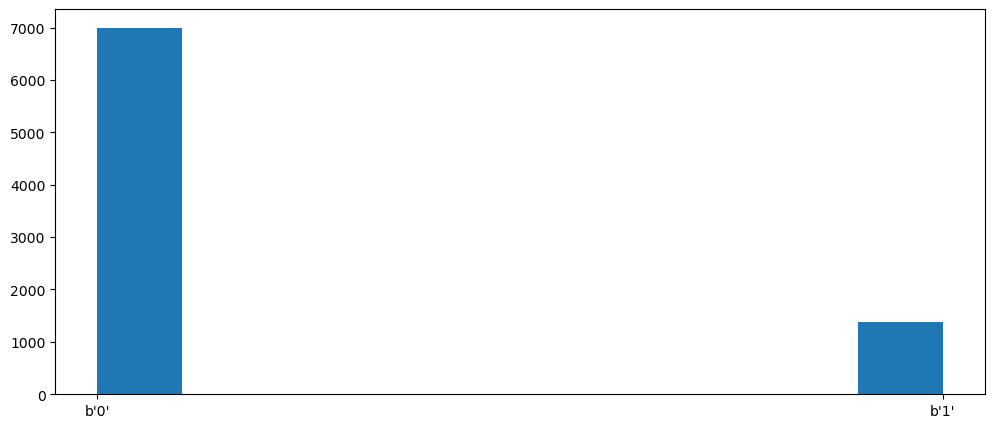

In [174]:
plt.hist(dates['match'])
plt.show()

###### 2. Physical features
Such as age, our and our partners age, race and education.For example lets see a distibution for a difference of ages on dates

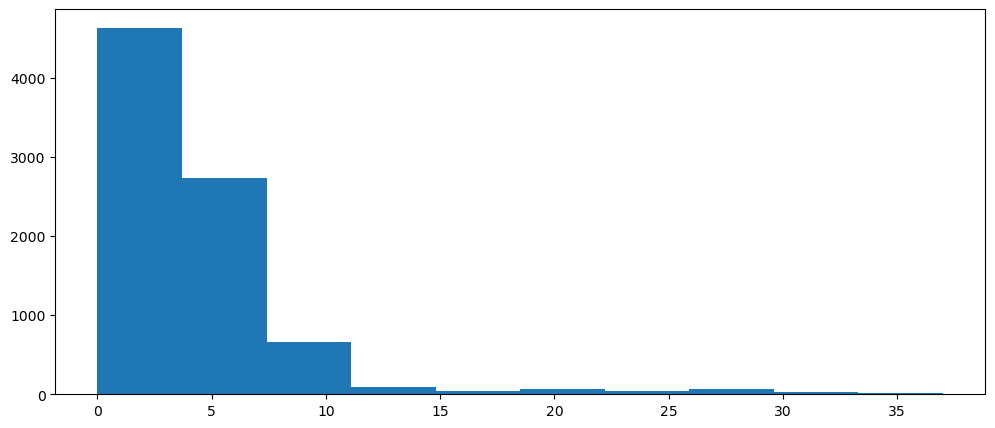

In [175]:
plt.hist(dates['d_age'])
plt.show()

###### 3. Personality features

In response are used the 5 traits:attractiveness, sincerity, intelligence, funny and ambitions. Each row contains preferences of partner for each trait, rating by partner on respondent for each trait, respondernts preferences, respondents rating on partner and respondents self-assessment. The data are located in corresponding columns: pref_o_X, X_o, X_importance, X_partner and X, where X is a mentioned trait.



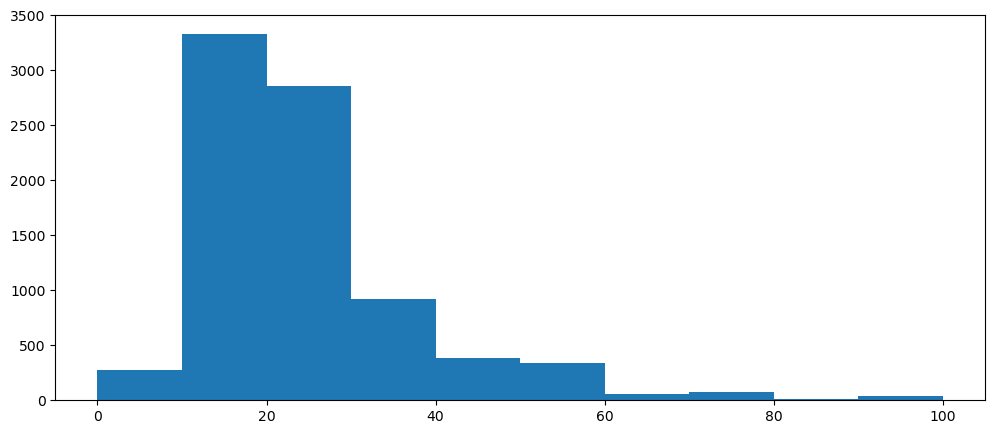

In [87]:
plt.hist(dates['pref_o_attractive'])
plt.show()

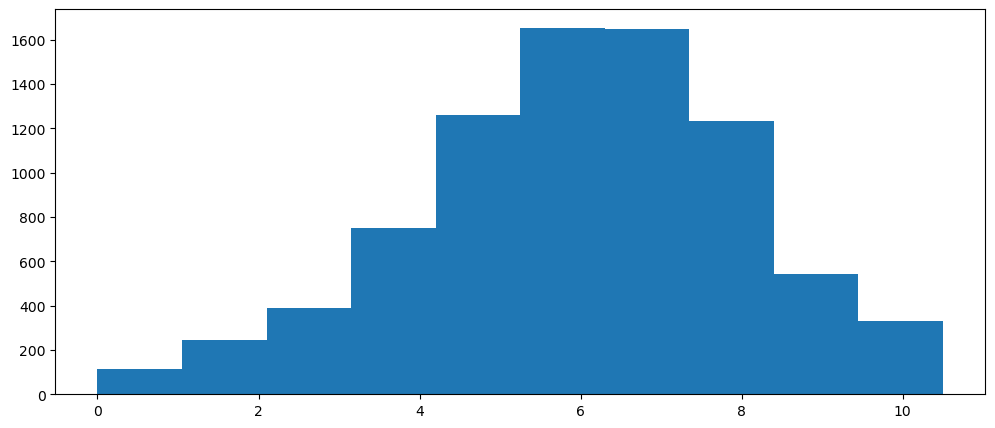

In [96]:
plt.hist(dates['attractive_o'])
plt.show()

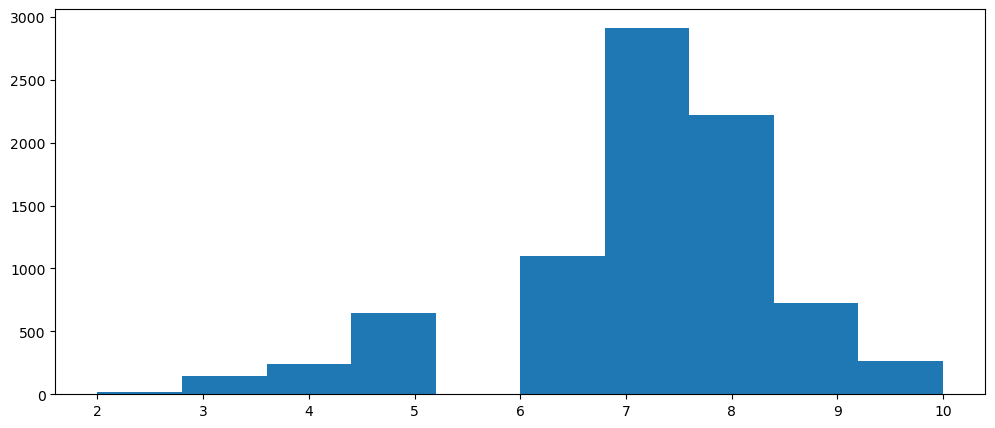

In [177]:
plt.hist(dates['attractive'])
plt.show()

As we can see,the majority of respondents do not have a high expectation of attractiveness and usually rate themselfs and their partners on 6-7

###### 4. Hobbie features
This group of faetures describes, how much  are respondents are interested in certain activity.Contains rates for sports, tvsports, exercises, dining, museums, art, hiking, gaming, clubbing, reading, tv, thater, movies, concerts, music, shopping and yoga. Also contains field interests_correlate, which describes how common are interests of respondent and partner. Lets see a distribution of clubbing.

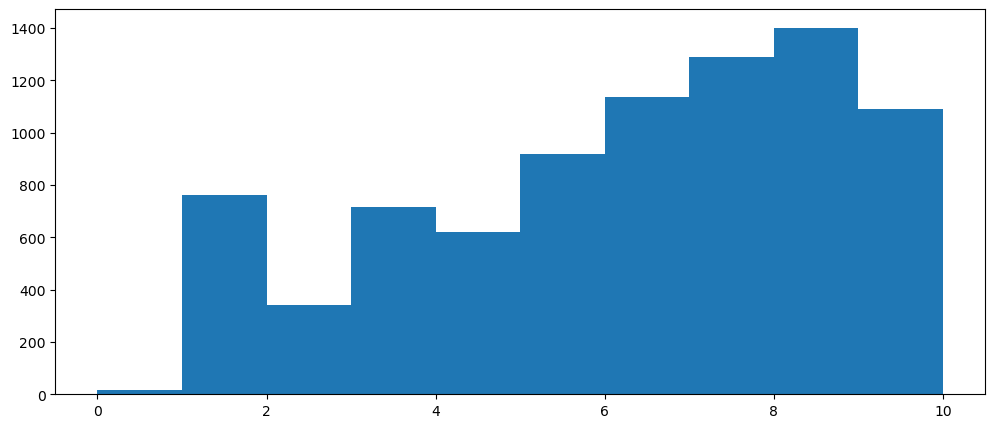

In [190]:
plt.hist(dates['clubbing'])
plt.show()

###### 7. Other features
Feature expected_num_matches describes how muck matches do respondents expect to receive. Features like and guess_prob_liked describe how much did they like their partner and what is a probabilty partner likes them. Features decision and decision_o describe decision of respondent and their partners


## 3. Data preprocessing


### Features removal

At first we delete unused and duplicated columns. All features with prefix d_ are categorical that are based on numerical, so we can delete them.We will leave d_age feature, as we will use it as the only feature for age.So we delete other age features, the same as has_null, wave, gender because they dont contain any usefull infromation,feature field, as it has too many values that are overlapped and decision. Also we delete column that have more than 1000 null values

In [105]:
dates['field'].unique()

array(["b'Law'", "b'law'", "b'Economics'",
       "b'Masters in Public Administration'",
       "b'Masters of Social Work&Education'", "b'Finance'", "b'Business'",
       "b'political science'", "b'money'", "b'Operations Research'",
       "b'TC [Health Ed]'", "b'Psychology'", "b'social work'",
       "b'Social Work'", "b'Speech Language Pathology'",
       "b'Speech Languahe Pathology'", "b'Educational Psychology'",
       "b'Applied Maths/Econs'", "b'Mathematics'", "b'Statistics'",
       "b'Organizational Psychology'", "b'Mechanical Engineering'",
       "b'Finanace'", "b'Finance&Economics'", "b'Undergrad - GS'",
       "b'Mathematical Finance'", "b'Medicine'", "b'MBA'", "b'LAW'",
       "b'?'", "b'psychology'", "b'German Literature'",
       "b'Business & International Affairs'", "b'MFA Creative Writing'",
       "b'Engineering'", "b'Electrical Engineering'", "b'Classics'",
       "b'Operations Research [SEAS]'", "b'chemistry'", "b'Journalism'",
       "b'Elementary/Childhood Educa

In [178]:
columns=list(dates.filter(regex="^d_").columns)
try:
    columns.remove('d_age')
except ValueError:
    pass
columns.extend(['wave','has_null','gender','field','decision','decision_o'])
try:
    dates = dates.drop(columns=columns)
except KeyError:
    pass
dates.head(3)

,age,age_o,d_age,race,race_o,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,...,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked,met,match
0,21.0,27.0,6.0,b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,35.0,20.0,...,8.0,1.0,0.14,3.0,2.0,4.0,7.0,6.0,0.0,b'0'
1,21.0,22.0,1.0,b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,60.0,0.0,...,8.0,1.0,0.54,3.0,2.0,4.0,7.0,5.0,1.0,b'0'
2,21.0,22.0,1.0,b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',2.0,4.0,19.0,18.0,...,8.0,1.0,0.16,3.0,2.0,4.0,7.0,NaN,1.0,b'1'


### Features processing

Some categorical columns contain b'', we want to remove it

In [179]:
def remove_b(feature):
    return feature.replace("b'",'').replace("'","")

cat_dataset = dates.select_dtypes(include = ['object'])
for feature in cat_dataset.columns:
    dates[feature] = dates[feature].apply(lambda x: remove_b(x))
    
dates.head(3)

,age,age_o,d_age,race,race_o,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,...,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked,met,match
0,21.0,27.0,6.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,35.0,20.0,...,8.0,1.0,0.14,3.0,2.0,4.0,7.0,6.0,0.0,0
1,21.0,22.0,1.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,60.0,0.0,...,8.0,1.0,0.54,3.0,2.0,4.0,7.0,5.0,1.0,0
2,21.0,22.0,1.0,Asian/Pacific Islander/Asian-American,Asian/Pacific Islander/Asian-American,1,2.0,4.0,19.0,18.0,...,8.0,1.0,0.16,3.0,2.0,4.0,7.0,NaN,1.0,1


In [180]:
nulls = dates.isnull().sum()
nulls

age                       95
age_o                    104
d_age                      0
race                       0
race_o                     0
                        ... 
expected_num_matches    1173
like                     240
guess_prob_liked         309
met                      375
match                      0
Length: 62, dtype: int64

We have a lot missed values, so we replace them with their median

In [181]:
for column, null_count in nulls.items():
   if null_count > 0:
       median_value = dates[column].median()
       dates[column].fillna(median_value, inplace=True)

Next, we normalize our numeric features

In [182]:
scaler = StandardScaler()

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_field_dates = dates.select_dtypes(include=numerics)

numeric_field_dates_scaled = pd.DataFrame(scaler.fit_transform(numeric_field_dates),columns=numeric_field_dates.columns)

for col in numeric_field_dates_scaled:
   dates[col]=numeric_field_dates_scaled[col]

Due to the fact around 80% of dates were not finished with match, we have a pretty imbalanced dataset, so we use an oversampling to solve this issue

In [183]:
len(dates[dates['match']=='0'])

6998

In [184]:
dates_no_match = dates[dates['match']=='0'] 
dates_match = dates[dates['match']=='1'] 

dates = resample(dates_match,replace=True,n_samples= 6998, random_state=42)

dates = pd.concat([dates, dates_no_match])

dates.shape

(13996, 62)

## 4. Modeling

## Supervised model

In this section, we will create machine learning models for predicting whether two individuals will match based on the most meaningful features. In this part, we used two machine learning algorithms, such as Decision tree and Decision forest. For performing we used the BigML platform.


##### Setting the target variable 

In BigML we set our target variable “match” and include our explanatory variables: d_age,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,
pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,attractive_important,
sincere_important,intellicence_important,funny_important,ambtition_important,
shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,
funny_partner,ambition_partner

Then we perform the training/test split with training 80%, test 20% and seed 42 configurations.

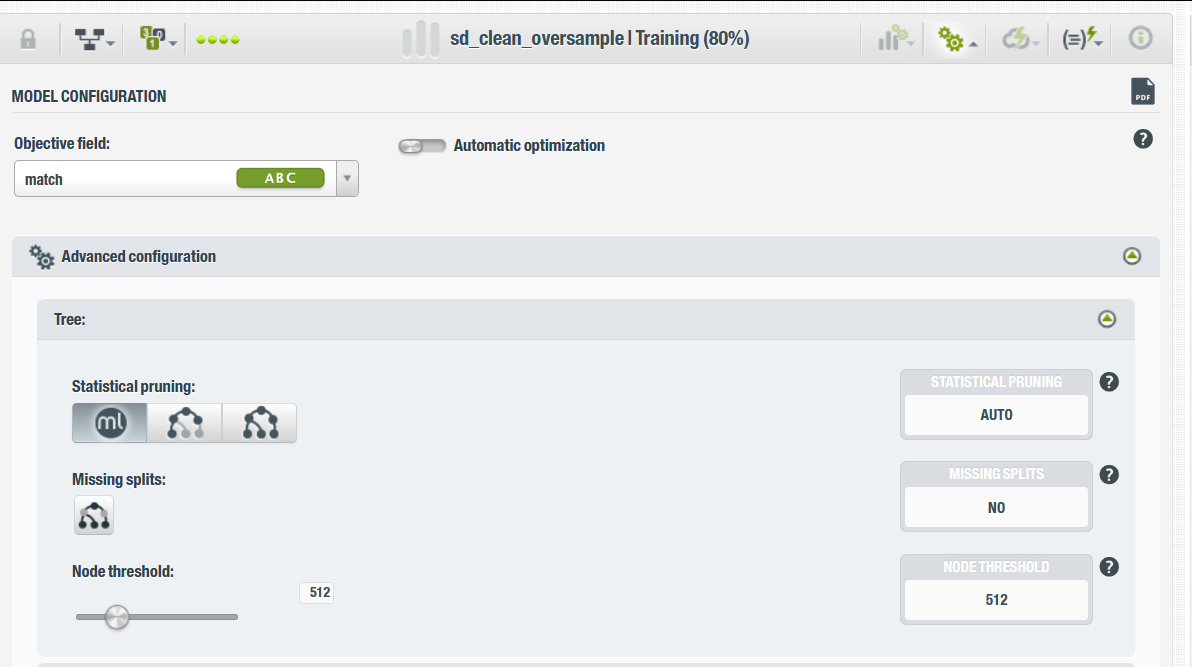


### Decision tree

Firstly we create a decision tree model with an automatically set configuration.

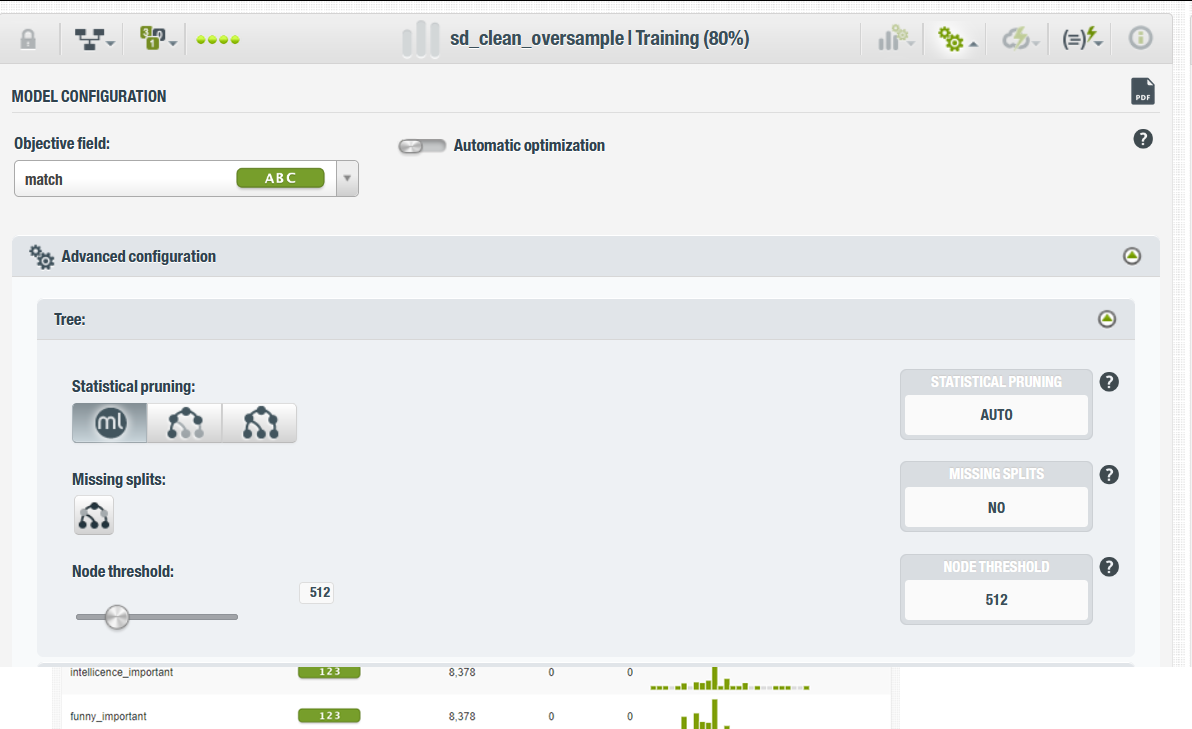

Then we evaluate our model on test data

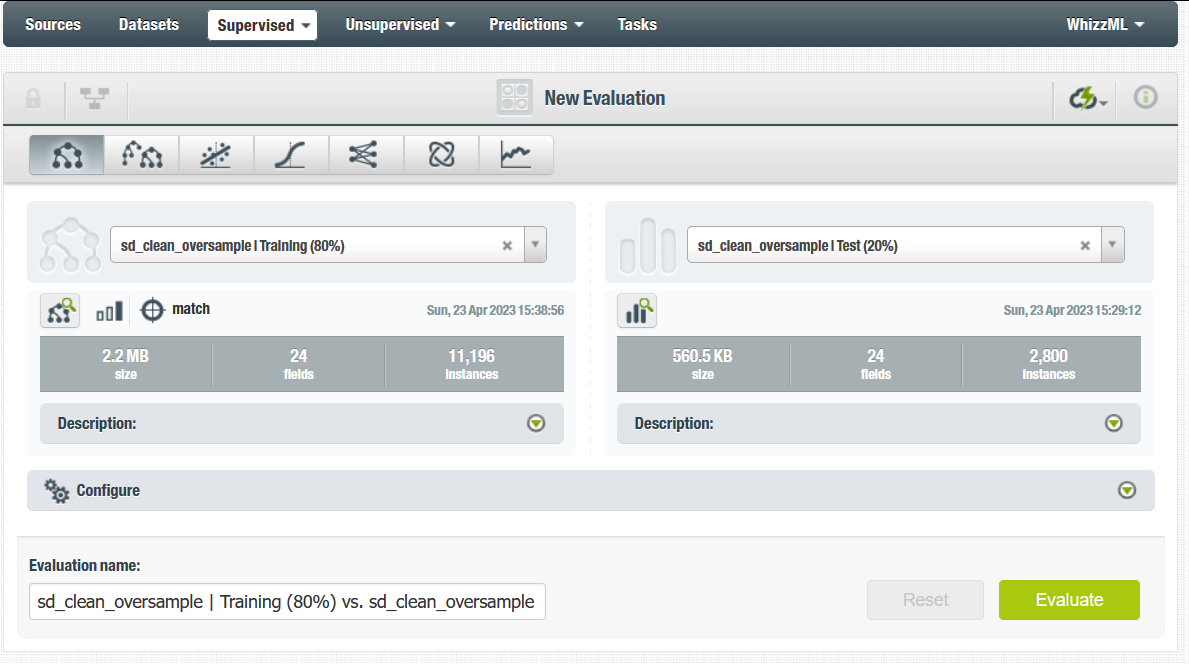

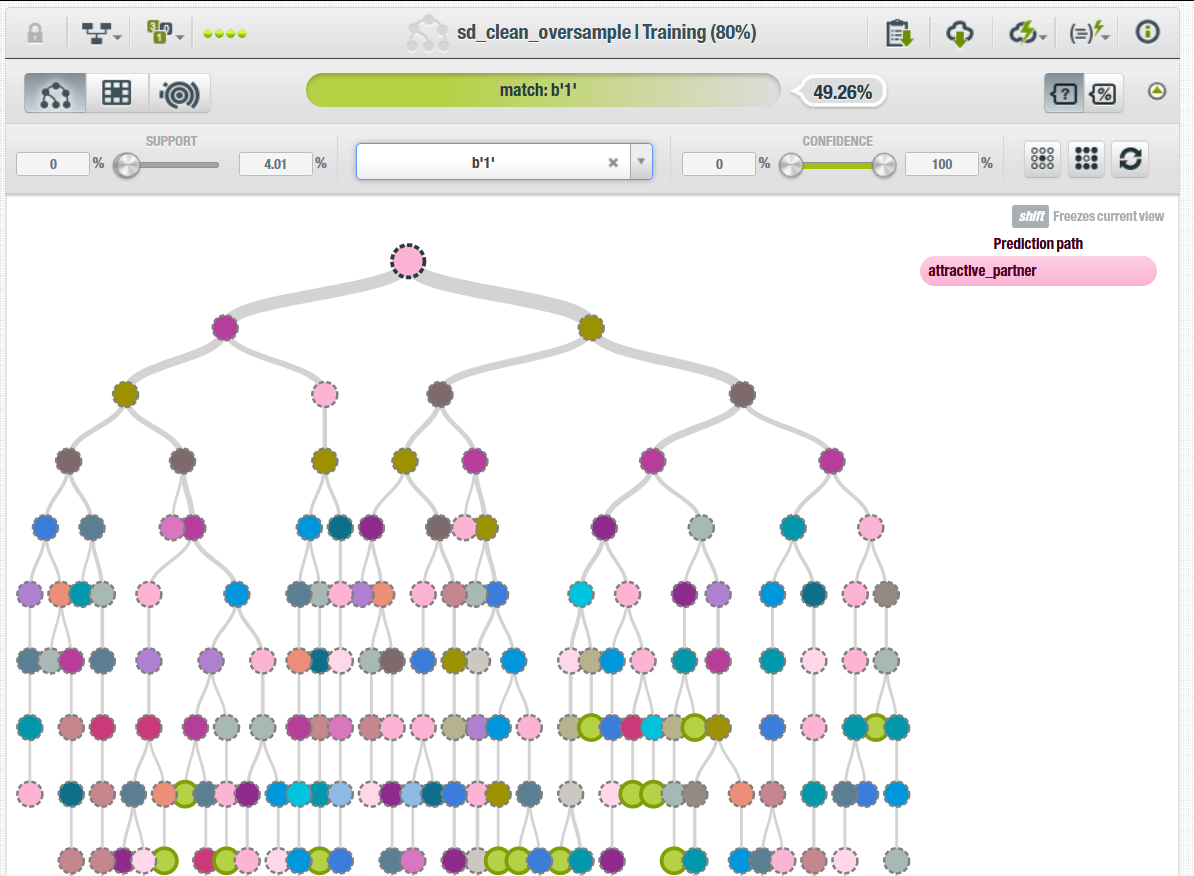

Then we evaluate our model on test data

The obtained evaluation results are:

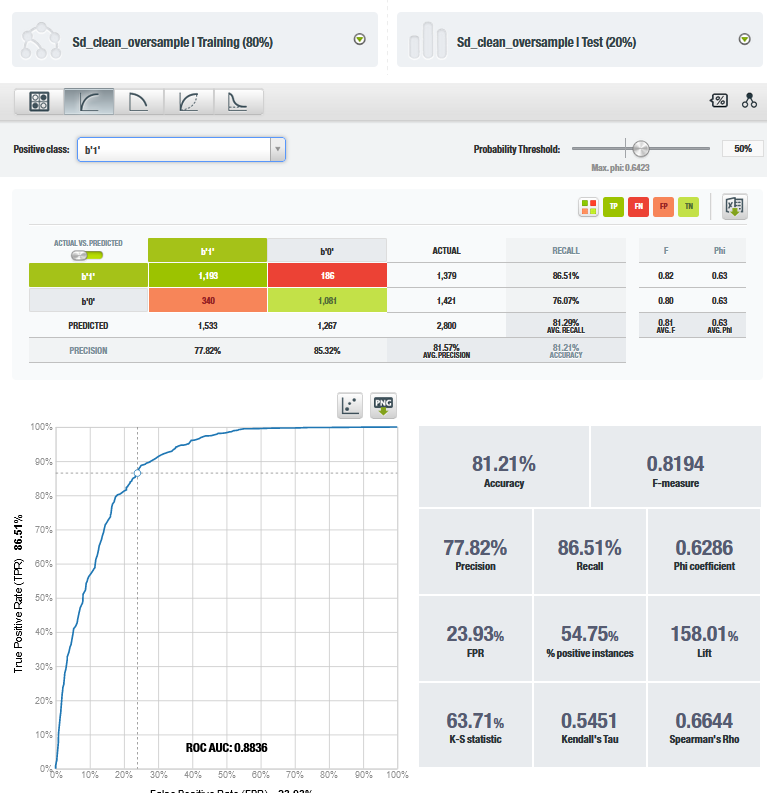

The prediction output:

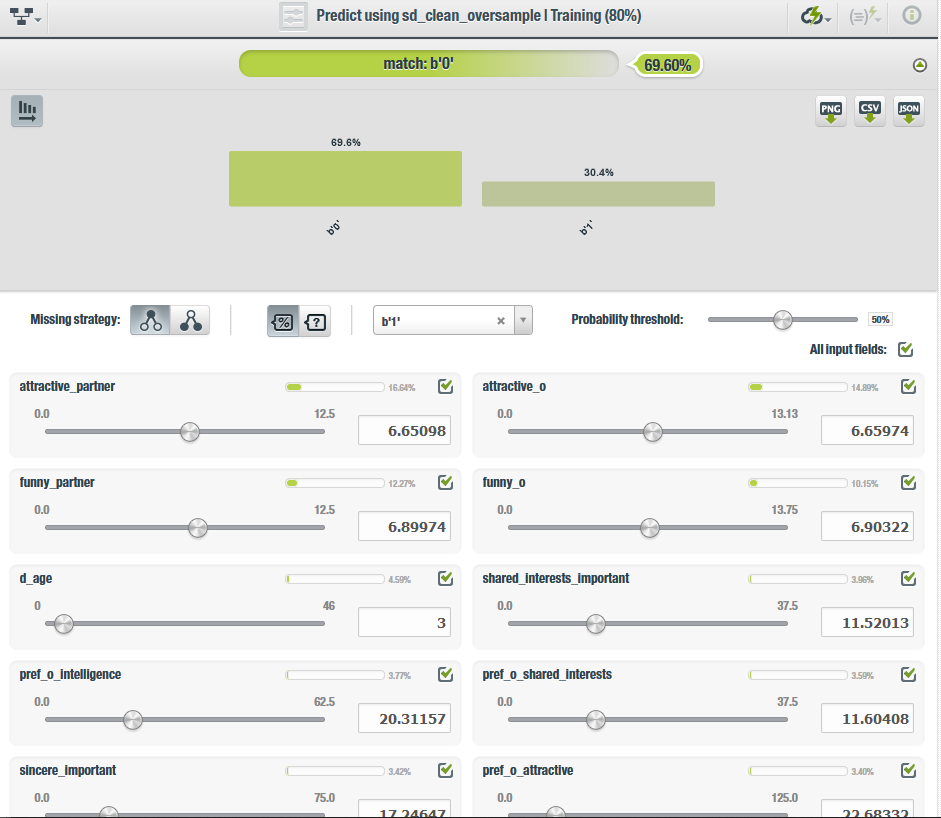

Important fields derived from Prediction Explanation

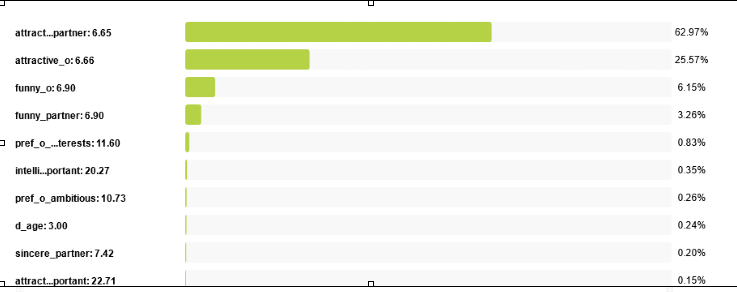

The tree is avaliable at https://bigml.com/shared/model/cJiNJhLeQ5PT9QyU2QH6dsDfwaq

The prediction for the instance of interest is 

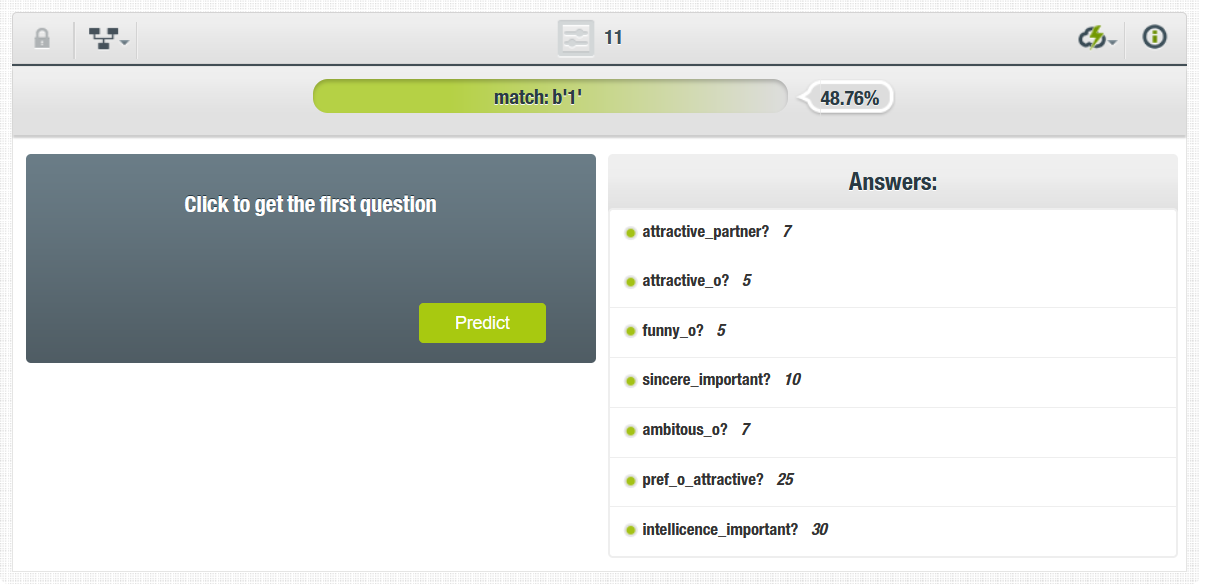


## Decision tree with various metaparameters:
As the maximum depth of a decision tree is not a configurable parameter in BigML. Instead, it is decided by the node threshold and the tree structure obtained from the data. The node threshold defines when tree growth stops; a lower node threshold produces a deeper tree, whilst a higher node threshold produces a shallower tree.

Firstly we randomly set a higher node threshold (1000):


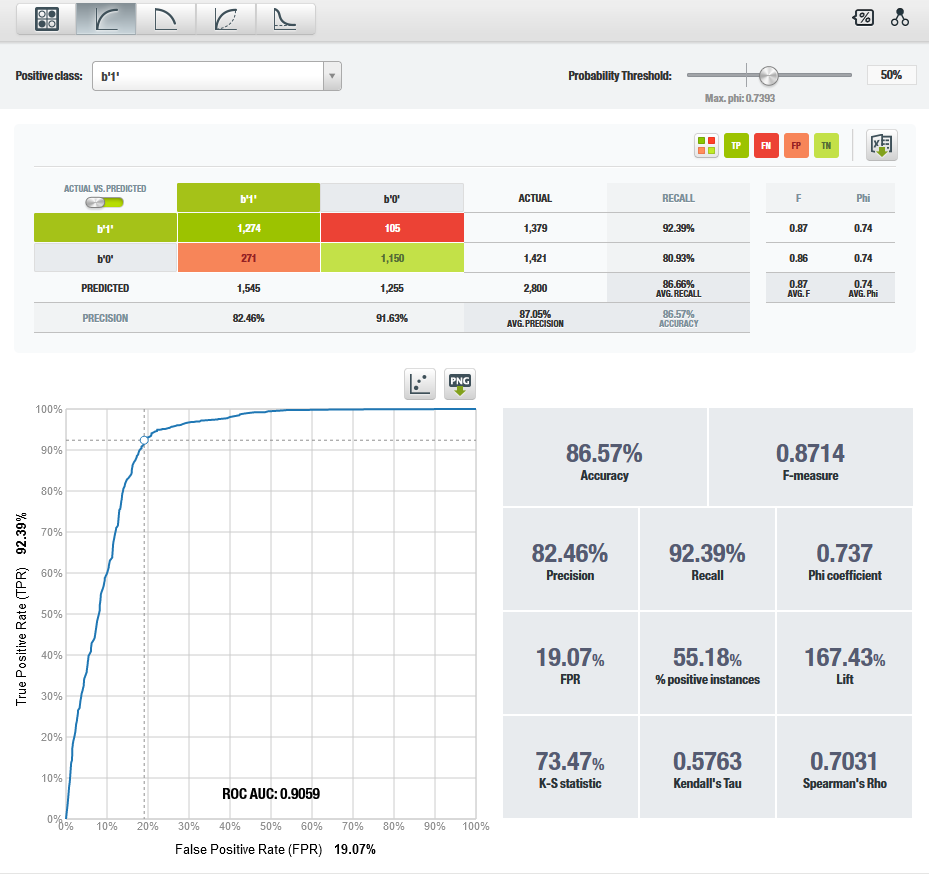

Then we randomly set the lower node threshold (400):

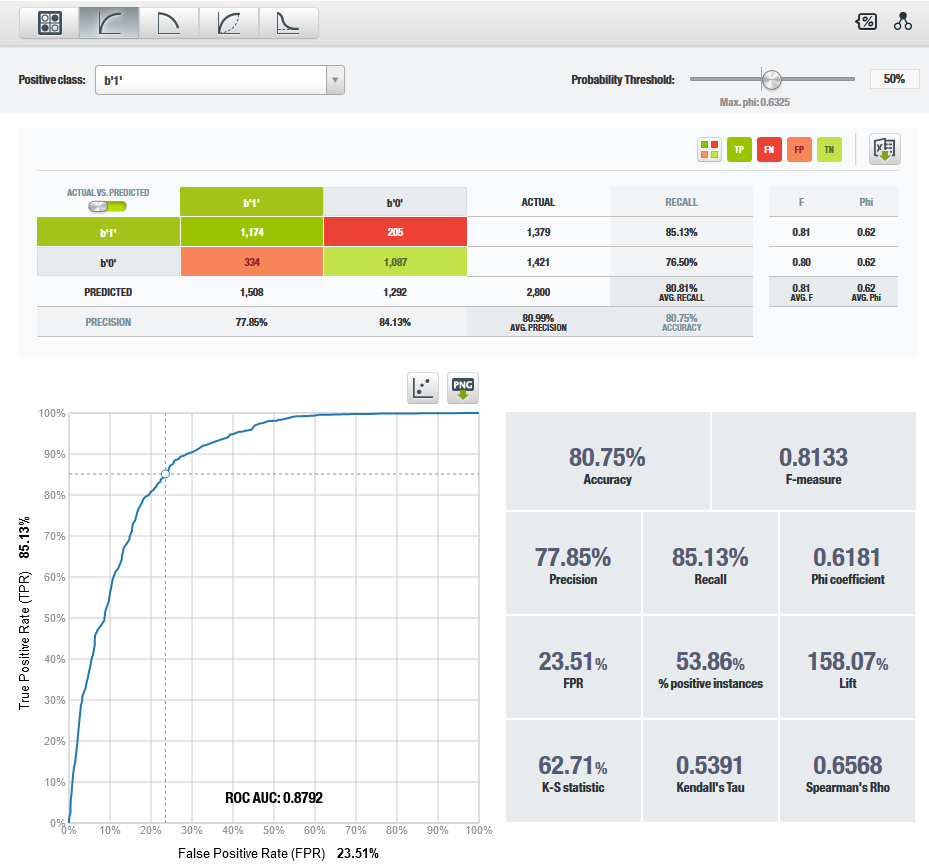

### Decision forest

In this section, we create a decision forest, starting with the automatically setted configuration.

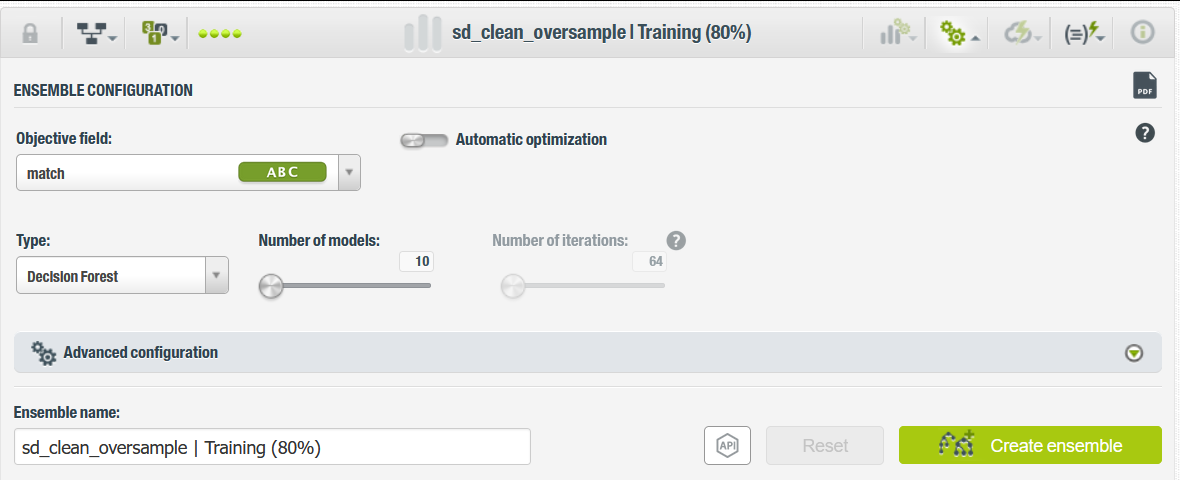

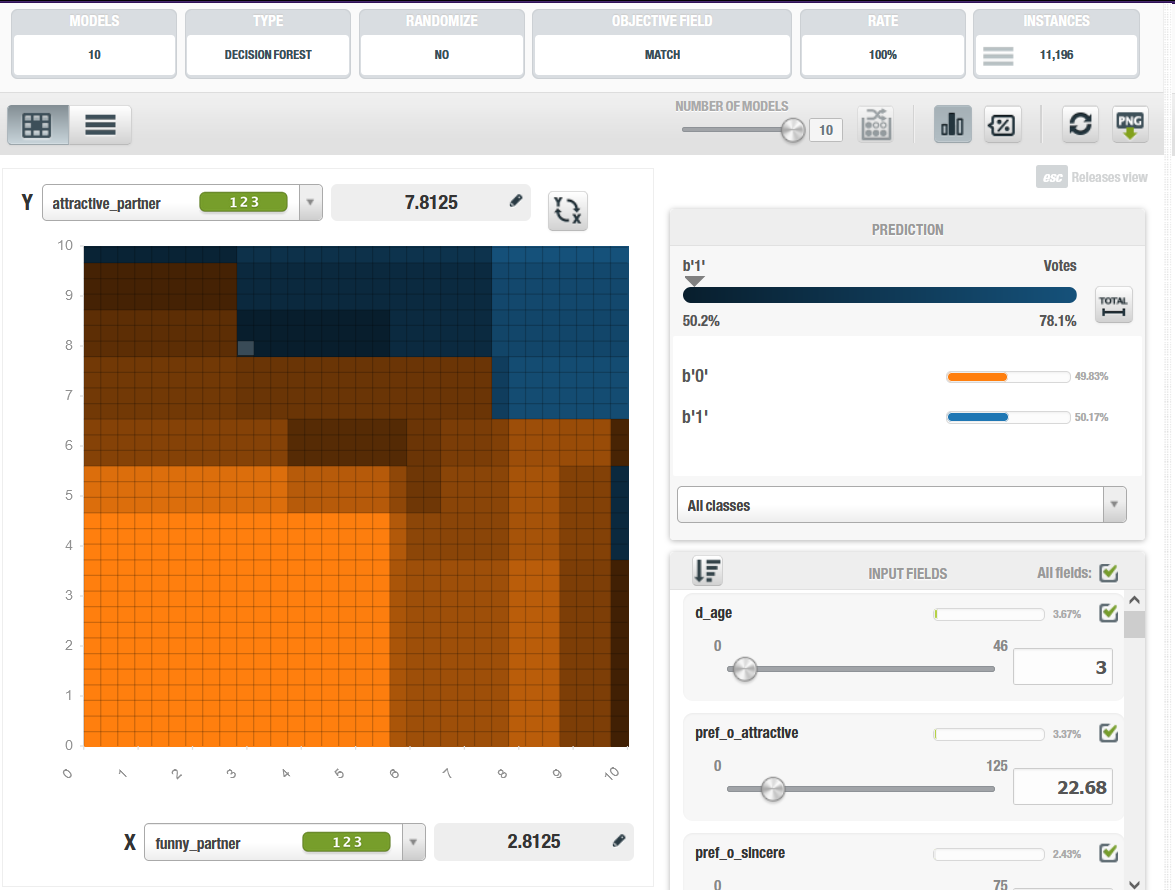

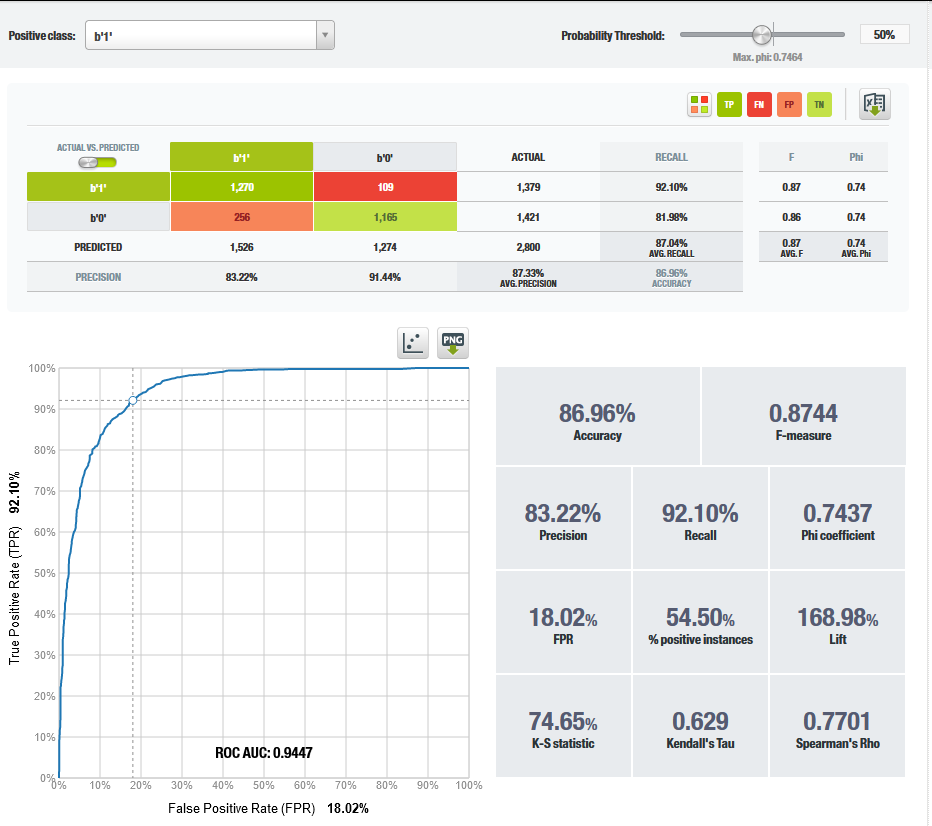

https://bigml.com/shared/ensemble/1mhVGaojXs5bzrKxd5eFvImvnLB


The prediction for the our candidate:

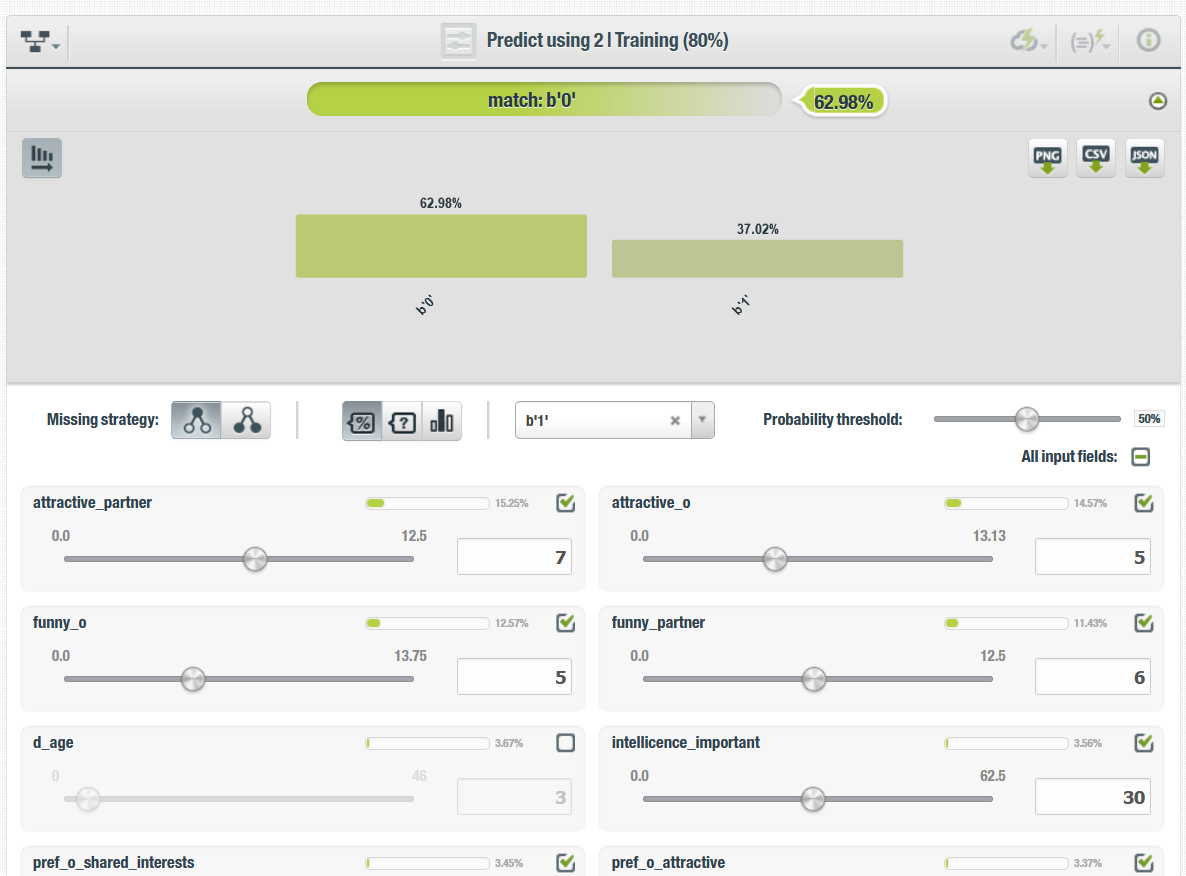


#### Decision forest with various metaparameters

The number of models in BigML's implementation of decision forests corresponds to the number of trees in the forest. The final prediction is obtained by aggregating the predictions of all trees in the forest. Each model in the forest is trained on a random subset of the data set.
By lowering the number of models, the resulting forest may be simpler to use but the model's accuracy could decrease, increasing the number of models, on the other hand, can improve accuracy but may also result in overfitting.
The decision forest with 5 models:
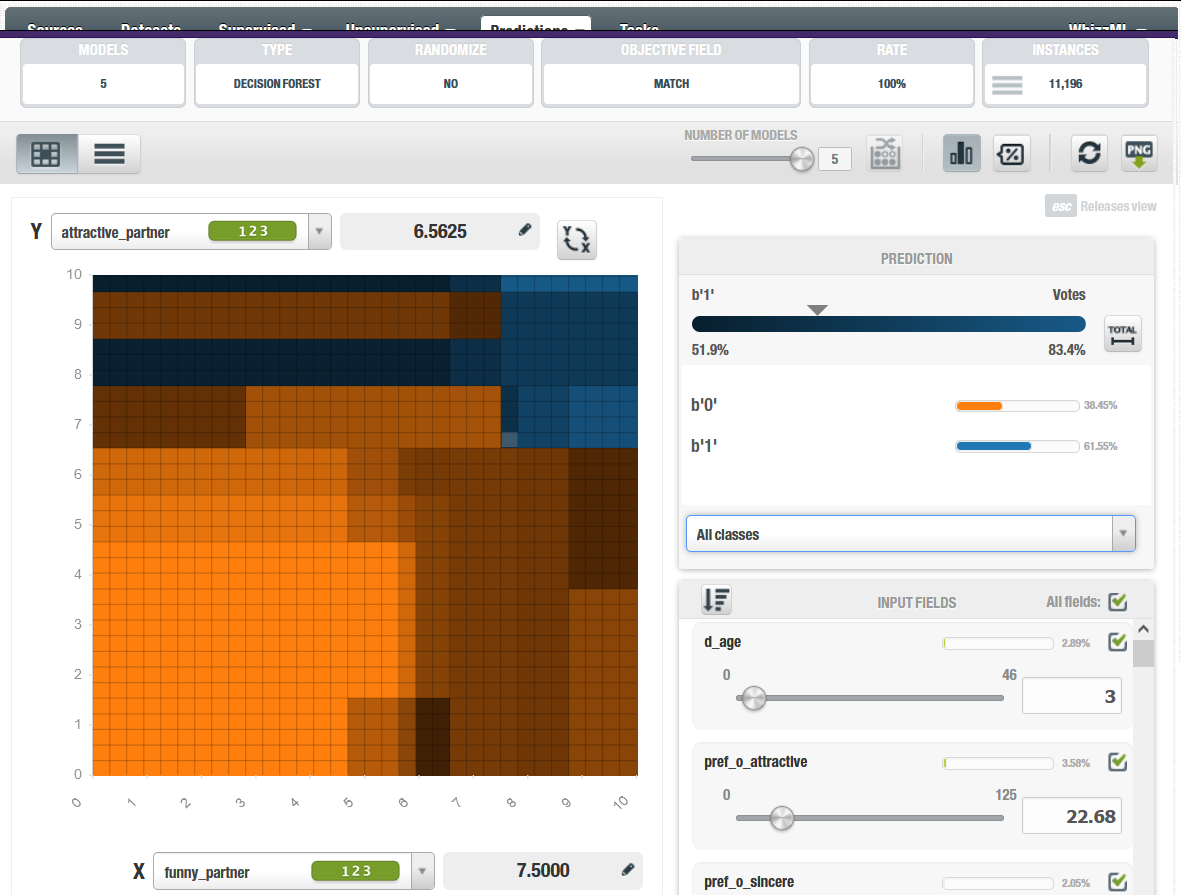

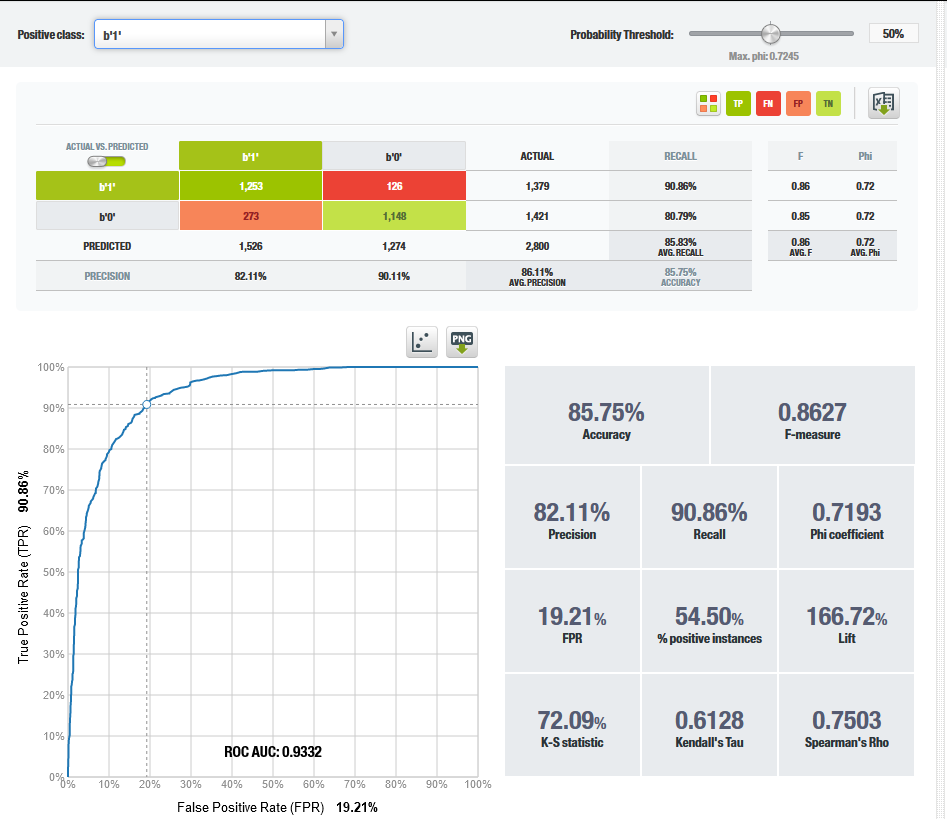

#### The decision forest with 20 models:

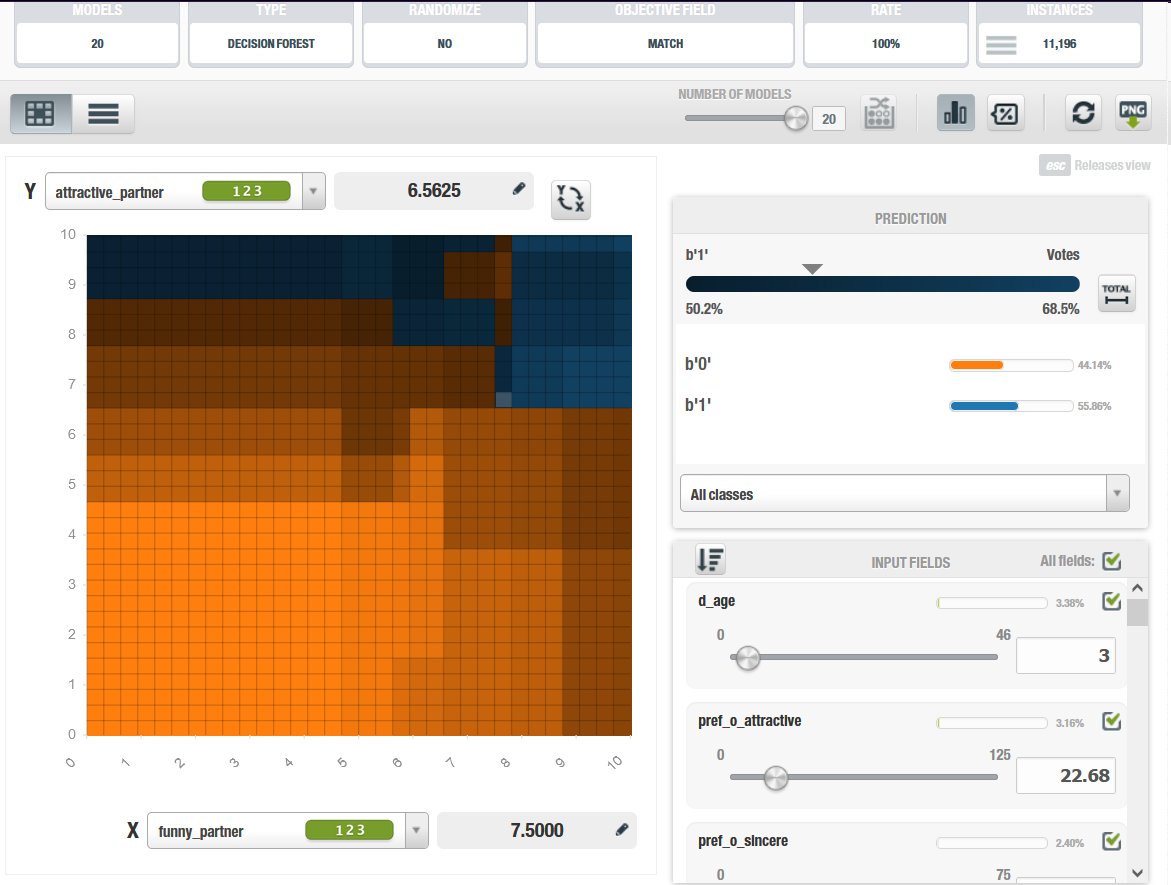

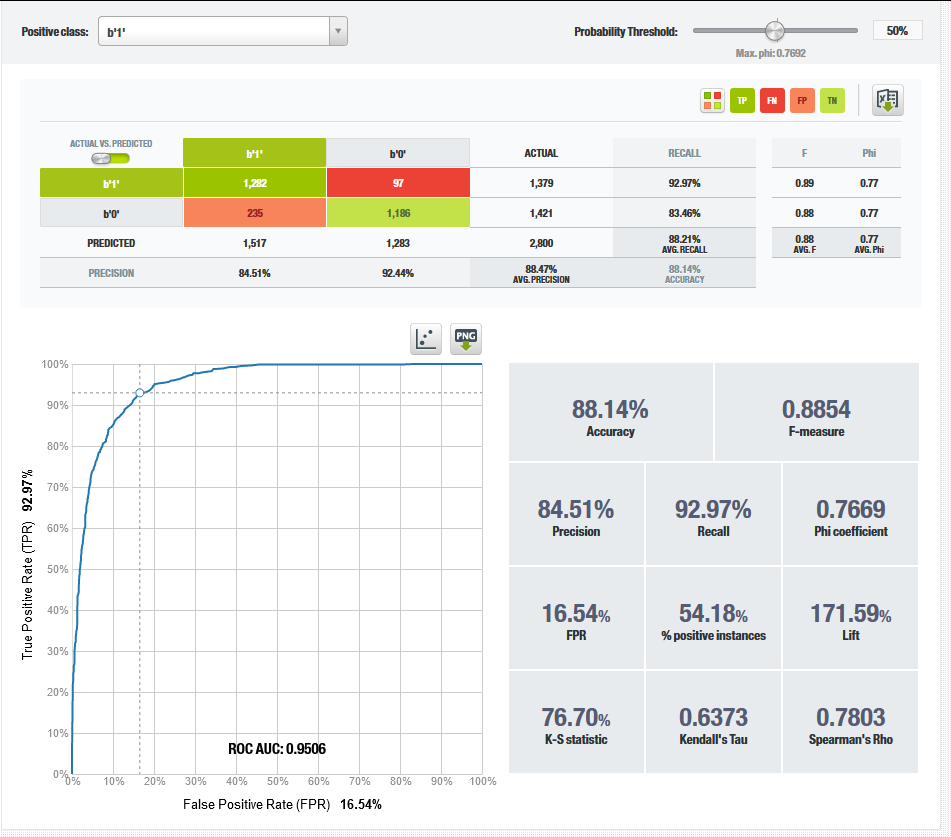

### Model evaluation
In our situation, the class distribution of our goal variable "match" is imbalanced because we are interested in forecasting matches between people based on personal attributes. In such instances, accuracy may not be the best metric to use to assess model performance because it is skewed toward the majority class.
As a result, we investigate other evaluation metrics such as F1 score, precision, and recall, which account for the imbalance in the class distribution. The F1 score is a statistic that combines precision and recall and is an appropriate choice for imbalanced datasets where false positives and false negatives are equally important.



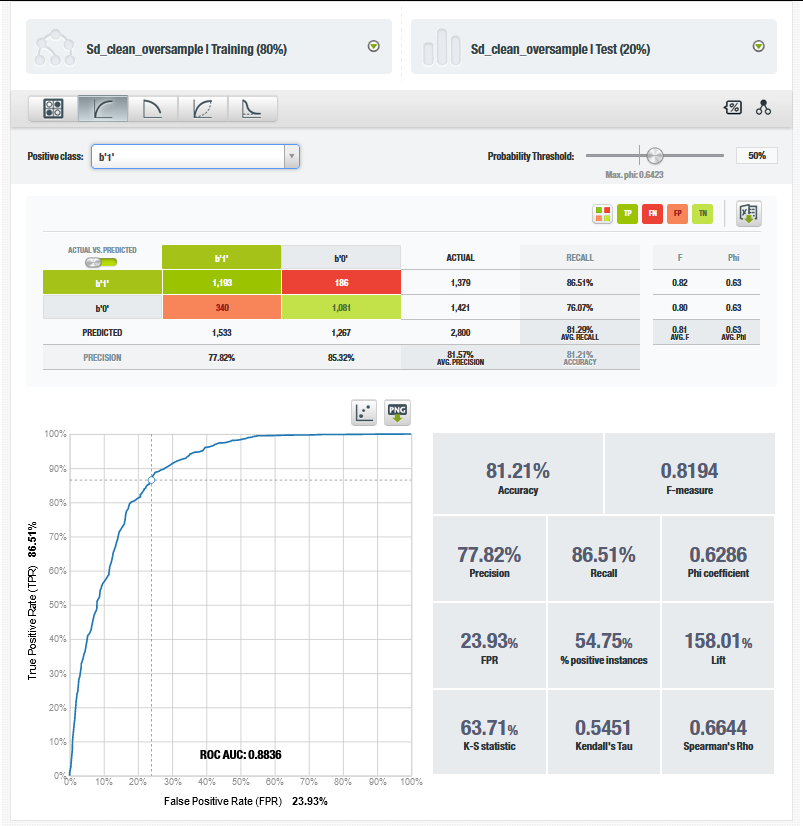

Our model's F-measure is 0.8194, which is equal to the harmonic mean of precision and recall. A higher F-measure indicates the model's precision and recall have been balanced.
The model's precision is 77.82%, which means that when it predicted a positive match, it was correct 77.82% of the time.
The model's recall is 86.51%, which means it successfully detected 86.51% of all positive matches in the dataset.
The model appears to have a high recall and F-measure, indicating that it is good at detecting positive matches. The precision, however, is lower than the recall, indicating that the model may generate a considerable number of false positives.



According to the results, the decision forest model appears to have outperformed the decision tree model.

The decision forest model has a higher F-measure than the decision tree model, which is 0.8744. This suggests that the decision forest model outperformed the decision tree model in terms of precision and recall.
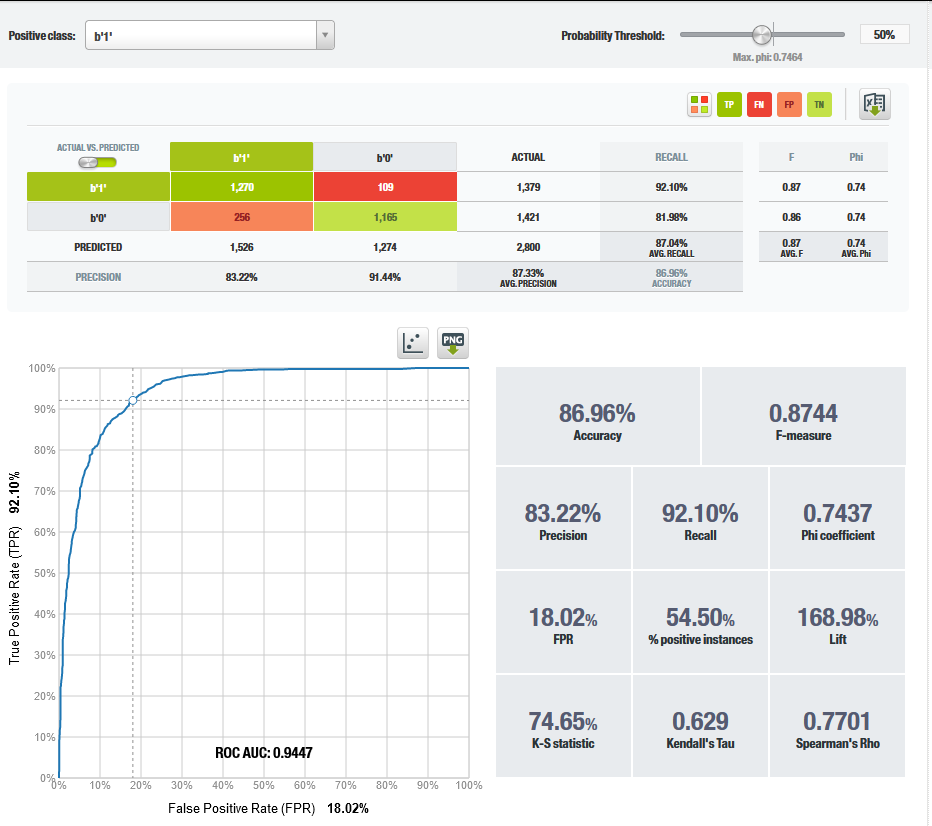

The decision forest model has a precision of 83.22%, which implies that when it predicted a positive match, it was correct 83.22% of the time. This is less precise than the decision tree model's precision, but the difference is not significant.

The decision forest model has a recall of 92.10%, which implies that it accurately detected 92.10% of all positive matches in the dataset. This is higher than the recall of the decision tree model, showing that the decision forest model is more accurate at detecting positive matches.

In terms of accuracy, F-measure, and recall, the results show that the decision forest model outperforms the decision tree model. In terms of accuracy, F-measure, and recall, the results show that the decision forest model outperforms the decision tree model.
Comparison of decision tree and decision forest (ROC-curve):

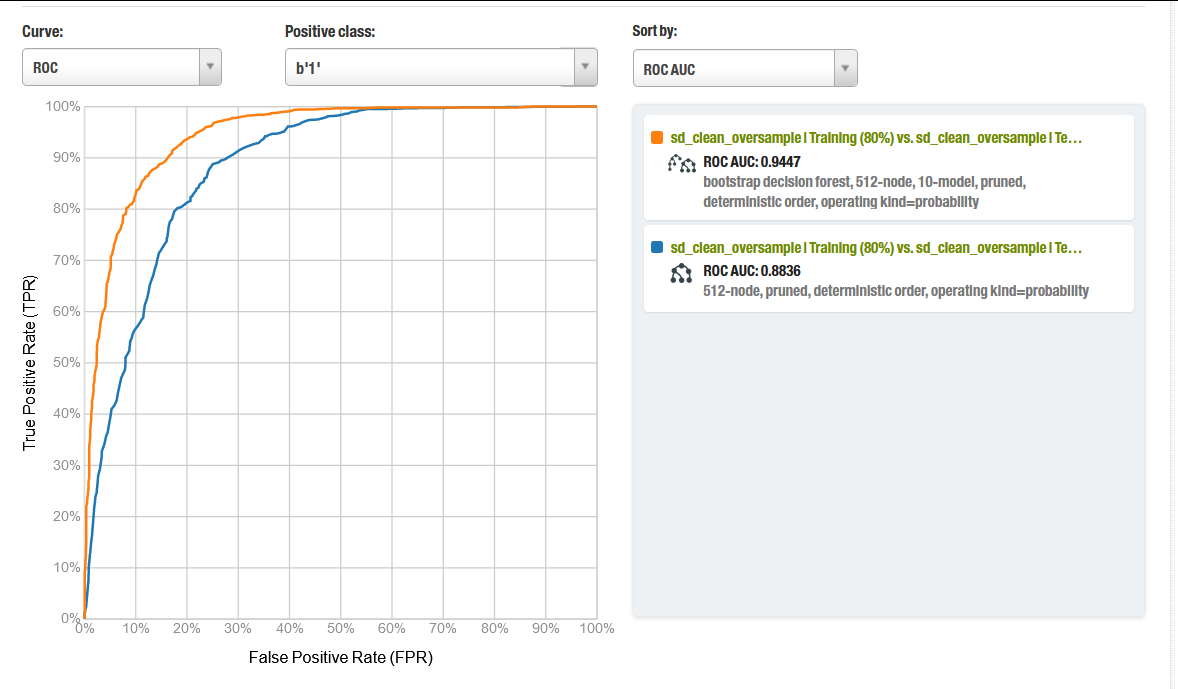

The ROC AUC is a measure used to assess the effectiveness of binary classification models. The greater the AUC score, the better the model distinguishes between positive and negative cases.
In our situation, the decision forest model has a higher ROC AUC of 0.9447 than the decision tree model (0.8836). This implies that the decision forest model outperforms the decision tree model in differentiating between positive and negative cases.
To compare the confusion matrices to the cost matrix, we can calculate the total cost of each model using the cost matrix and the values in the confusion matrices.
For the Decision Tree model:
Total Cost = (TP * Cost of TP) + (TN * Cost of TN) + (FP * Cost of FP) + (FN * Cost of FN)
Using the confusion matrix and the cost matrix:
Total Cost = (1193 * 1) + (1081 * 1) + (340 * 2) + (186 * 3) = 2185
For the Decision Forest model:
Total Cost = (TP * Cost of TP) + (TN * Cost of TN) + (FP * Cost of FP) + (FN * Cost of FN)
Using the confusion matrix and the cost matrix:
Total Cost = (1270 * 1) + (1165 * 1) + (256 * 2) + (109 * 3) = 1078
As we can see, the total cost for the Decision Forest model is lower than the total cost for the Decision Tree model. This means that the Decision Forest model is better at predicting matches and non-matches in the context of the given cost matrix.

## Clustering

To create a clustering model, the following subset of the data was chosen:

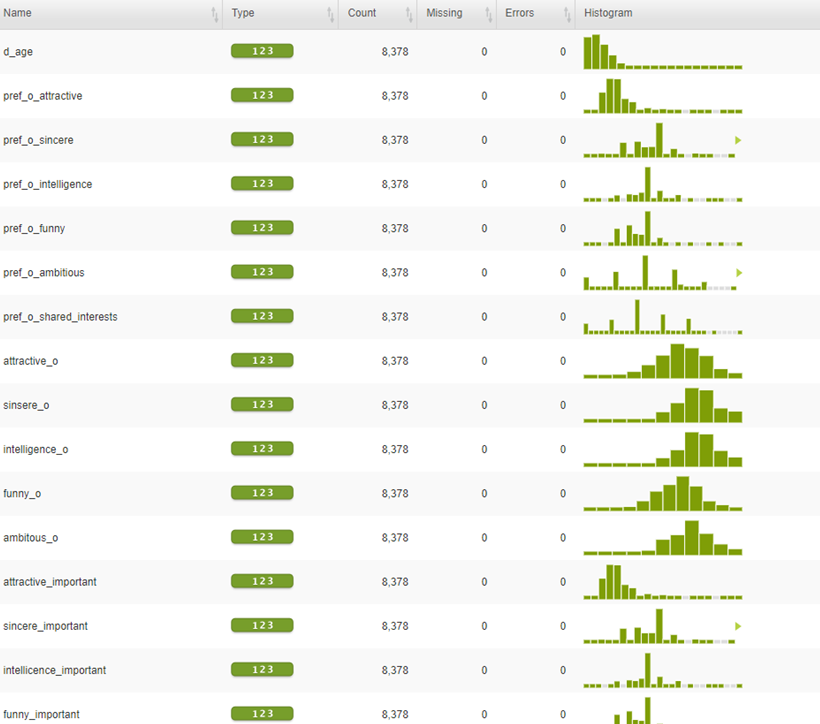



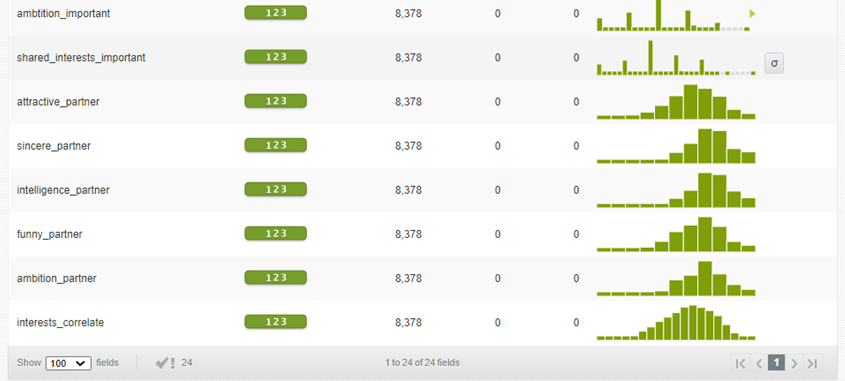

## Clustering

Our goal was to find out what qualities people who participate in speed dating look for in their partners.

2 types of clusters were created: K-means and G-means. Testing various metaparameter settings (number of clusters for k-means, critical value for g-means) we chose 11 for K-means and 5 for G-means.

      K-means Cluster (k=11) with 11 centroids
·         
·        Data distribution:
·        Global: 100% (8378 instances)
·        Cluster 00: 17.57% (1472 instances)
·        Cluster 01: 6.90% (578 instances)
·        Cluster 02: 8.62% (722 instances)
·        Cluster 03: 21.57% (1807 instances)
·        Cluster 04: 5.74% (481 instances)
·        Cluster 05: 4.20% (352 instances)
·        Cluster 06: 3.89% (326 instances)
·        Cluster 07: 12.69% (1063 instances)
·        Cluster 08: 2.76% (231 instances)
·        Cluster 09: 7.21% (604 instances)
·        Cluster 10: 8.86% (742 instances)
·         
·        Cluster metrics:
·        total_ss (Total sum of squares): 1664.016300
·        within_ss (Total within-cluster sum of the sum of squares): 1187.507230
·        between_ss (Between sum of squares): 476.509070
·        ratio_ss (Ratio of sum of squares): 0.286360
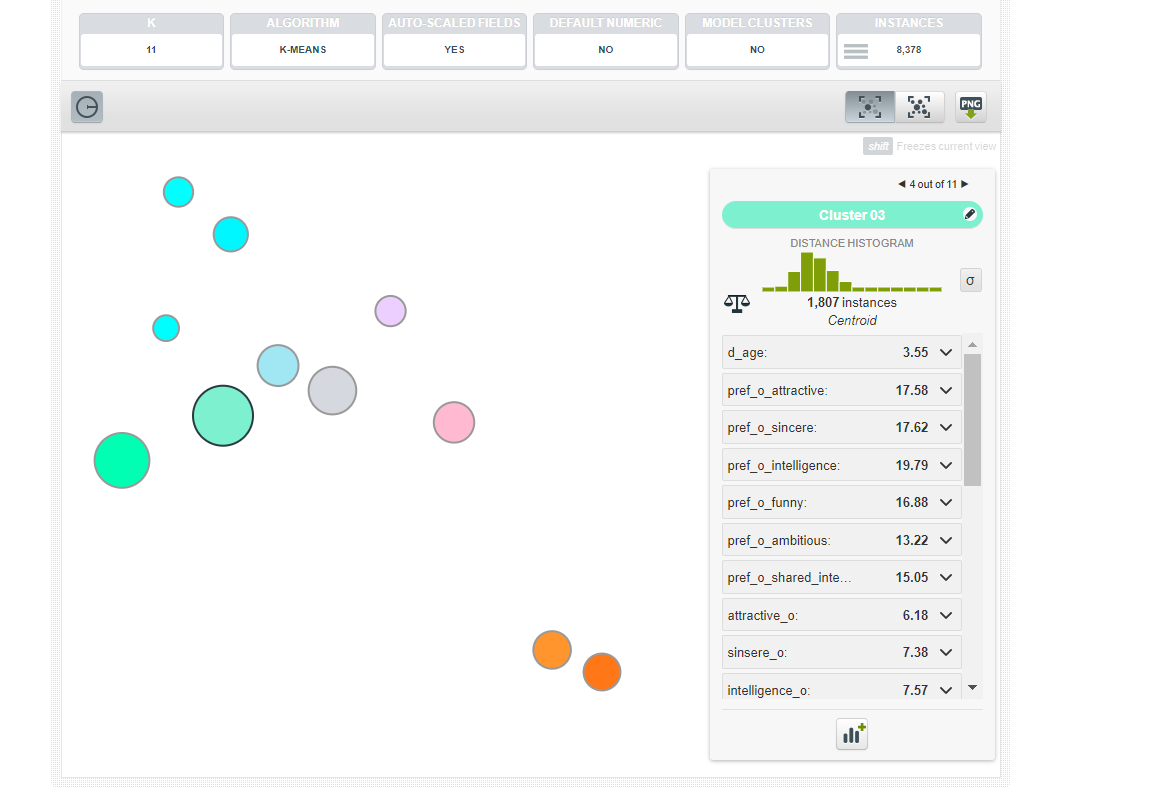

You can find a model here - [https://bigml.com/shared/cluster/8CevEohMfmq0DOzLLflqtcL0kw9]

#### Explanation

We have grouped our list of participants into 9 groups using the unsupervised k-means algorithm. Using centroids allowed us to see the variances of the variables more clearly.
Describing the main clusters :
Light pink samples (cluster 0) with high ranking for being funny and intelligent is the biggest segment.

</p>Blue samples (cluster 1) with high ranking for importance of their partner being intelligent.
</p>Light pink samples (cluster 2) with high ranking for being funny and importance of their partner being funny.
</p>Pale green samples (cluster 3), some of which tend to be sincere, ambitious and intelligent, but have low preferences for intelligent partner. This cluster has much bigger match rate then any other.
</p>Pale blue samples (cluster 4) with high ranking for preferences of their partner being intelligent, on the other hand with low ranking for being intelligent.
</p>Pink samples (cluster 5) with high ranking for preferences of their partner being intelligent, on the other hand with low ranking for being intelligent.
</p>Green samples (cluster 6) with high ranking for importance of their partner being intelligent.
</p>Orange samples (cluster 7) with high ranking for being attractive and funny tend to have preferences for funny partner.
</p>Pale orange samples (cluster 8) with very high ranking for importance of their partner being attractive.
</p>Light green samples (cluster 9) with high ranking for preferences of their partner being sincere.

So we got to a final accuracy of 81% on the test set and it seems that the generalization error isn't too bad.


In [192]:
clusters = pd.read_csv(r'C:\pd\cluster_with_match.csv')

clusters.head(10)


,Unnamed: 0,Centroid_name,pref_o_shared_interests,pref_o_intelligence,pref_o_sincere,pref_o_ambitious,pref_o_funny,pref_o_attractive,ambtition_important,shared_interests_important,...,Maximum intercentroid distance,Distance sum squares,Distance standard deviation,Distance sum,Distance median,Distance maximum,Distance minimum,Distance variance,Distance mean,match
0,0,Global,11.81458,20.37818,17.24590,10.54999,17.41963,22.68374,10.704,11.78225,...,NaN,1664.01630,0.12361,3587.31068,0.40861,1.21115,0.12695,0.01528,0.42818,0.000000
1,1,Cluster 00,11.97704,20.24678,17.06410,12.90622,18.37562,19.37343,12.06512,11.23035,...,0.527120,176.89116,0.08270,495.55359,0.32739,0.71215,0.16112,0.00684,0.33665,0.069372
2,2,Cluster 01,12.06541,21.73478,18.20063,11.31049,17.49226,19.20908,3.83413,6.10890,...,0.527961,108.52049,0.09477,244.39584,0.40884,0.76558,0.19098,0.00898,0.42283,0.197647
3,3,Cluster 02,5.82282,22.21651,23.87854,5.07007,17.76005,25.21680,íîÿ.11,12.64567,...,0.463086,98.80818,0.08110,260.60643,0.35330,0.65466,0.18323,0.00658,0.36095,0.383607
4,4,Cluster 03,15.04814,19.78551,17.61610,13.22391,16.88394,17.58034,12.53343,14.16754,...,0.452304,188.33842,0.07769,566.24270,0.30516,0.76179,0.11497,0.00604,0.31336,0.048825
5,5,Cluster 04,11.75379,23.00830,17.99329,8.40453,17.23462,21.67318,7.25974,9.35159,...,0.495103,81.38052,0.08894,193.17767,0.39196,0.78311,0.21651,0.00791,0.40162,0.254682
6,6,Cluster 05,5.64179,13.79687,7.98621,3.20296,22.90098,47.00059,10.93431,14.33167,...,0.524734,65.50877,0.09417,148.20063,0.40695,0.68906,0.21795,0.00887,0.42102,0.115838
7,7,Cluster 06,6.47248,12.90305,7.77379,4.68085,8.67724,59.81835,11.06802,10.52728,...,0.573337,57.04660,0.09495,132.82287,0.39033,0.70330,0.19284,0.00902,0.40743,0.238095
8,8,Cluster 07,12.15544,20.98572,17.66001,11.19568,18.28968,19.75391,11.25495,12.34274,...,0.489460,148.34309,0.08817,385.89186,0.35173,0.75577,0.15872,0.00777,0.36302,0.093085
9,9,Cluster 08,11.59375,19.57249,17.60789,9.34053,18.99138,23.13992,8.73389,11.23019,...,0.573376,34.31892,0.12338,84.37348,0.34518,0.73074,0.10191,0.01522,0.36525,0.225301


## 5. Conclusion

<p>We've trained a machine learning model that can predict with around 81% accuracy if a speed dating participant considered their partner a match based on the ratings of the participant gave to their partner.
<p>However, there are many problems that can be raised regarding this project. First of all, we don't have any concrete evidence of each person's characteristics, so these scores don't necessarily indicate how much people overestimate their attributes. Instead, they show us how much higher participants think their scores should be than the scores they usually get. People tended to overestimate their scores compared to the scores others gave them. The biggest gap was for 'funny' and 'attractive', and the smallest gap was for 'intelligent'. Without any definite knowledge of each person's actual attributes, these scores don't necessarily demonstrate how precise people's estimations are.
<p>The second concern is that it’s hard to understand the output value that is selected. A value of 1 only shows that the person has received a response from the match, and does not provide any details about how many dates the person has had. Therefore, it is not possible to directly infer the overall attractiveness of the person.
